In [32]:
import numpy as np
import pandas as pd

from collections import OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

In this project we built logistic regression model in order to predict admission into graduate school basing on  grades and prestige of the undergraduate institution. 

## EDA

First of all, we provided EDA of our dataset. We have 4 variables: 1 response (admit) and 3 independent (gre, gpa, rank)

In [33]:
df = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
df.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


Than we checked the proportion of two classes in responce variable 'admit' and it is rather balanced. Admit is binary, so we can use logistic regression for value prediction.

In [34]:
df['admit'].value_counts(normalize=True)

0    0.6825
1    0.3175
Name: admit, dtype: float64

In our data we do not have any NAs.

In [35]:
df.isna().sum().sum()

0

We also estimated correlation coefficient between 3 independent variables. There is some positive correlation between gpa and gre values. However, we think that our predictors are inpependent from each other, so we can use logistic regression.

In [36]:
corr = df.iloc[:,1:4].corr()
corr

,gre,gpa,rank
gre,1.000000,0.384266,-0.123447
gpa,0.384266,1.000000,-0.057461
rank,-0.123447,-0.057461,1.000000


## Model fitting

We splited our dataset into train and test parts. Then we created our logistic regression model with all three predictors. We also provided quality analysis of our model.

In [37]:
y = df.admit
X = df.drop(['admit'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, shuffle=True, random_state=42)
log_regr_clf = LogisticRegression(random_state=0)
log_regr_clf.fit(X_train, y_train)
y_pred_test = log_regr_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.71      0.93      0.80        90
           1       0.54      0.17      0.25        42

    accuracy                           0.69       132
   macro avg       0.62      0.55      0.53       132
weighted avg       0.65      0.69      0.63       132



Accuracy of our model is rather good, but recall of class 1 is very low. We tried to decrease regulariztion and it made our model a little bit better.

In [38]:
log_regr_clf = LogisticRegression(random_state=0, C = 10)
log_regr_clf.fit(X_train, y_train)
y_pred_test = log_regr_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        90
           1       0.60      0.21      0.32        42

    accuracy                           0.70       132
   macro avg       0.66      0.57      0.56       132
weighted avg       0.68      0.70      0.65       132



We also plotted ROC-curve in order to estimate AUC of our model

In [39]:
def get_roc_auc(estimator, y_test, X_test):
    probs = estimator.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

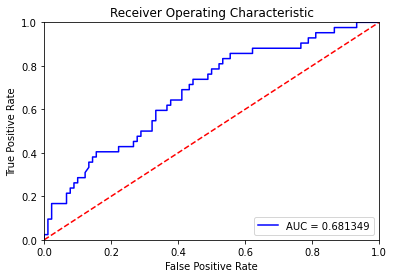

In [40]:
get_roc_auc(log_regr_clf, y_test, X_test)

## Plot of model predictions

Text(0.5, 0, 'GRE')

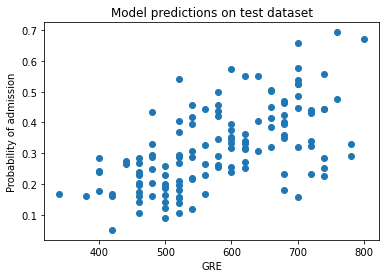

In [41]:
plt.scatter(X_test.gre,log_regr_clf.predict_proba(X_test)[:,1])
plt.title('Model predictions on test dataset')
plt.ylabel('Probability of admission')
plt.xlabel('GRE')